1. 푸쉬 노티피케이션 타임 의사 결정 하기

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

In [3]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[-1], figsize = (20, 10), rotation = 45):
    plot = df.plot(kind = 'bar', color = color, figsize = figsize)
    plot.set_xlabel(xlabel, fontsize = 11)
    plot.set_ylabel(ylabel, fontsize = 11)
    plot.set_title(title, fontsize = 13)
    plot.set_xticklabels(labels = df.index, rotation = rotation)

In [4]:
dtypes = {
    'UnitPrice' : np.float32,
    'CustomerID' : np.int32,
    'Quantity' : np.int32
}
retail = pd.read_csv('OnlineRetailClean.csv', dtype = dtypes)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format = True)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### 쿠폰 발송을 할 때 push를 언제 보내는 게 좋을까?
- 가장 많이 주문이 일어나는 시점에서 하는 것이 가장 직관적인 판단
    1. 데이터로 파악
    2. 가설 제시
    3. 가설 검증
    4. 1 ~ 3 반복
- 시간(hour, minute)과 주로 관련되기 때문에 역시 InvoiceDate가 중요한 feature

In [5]:
order_by_hour = retail.set_index('InvoiceDate').groupby(lambda date : date.hour).count()['CustomerID']
order_by_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

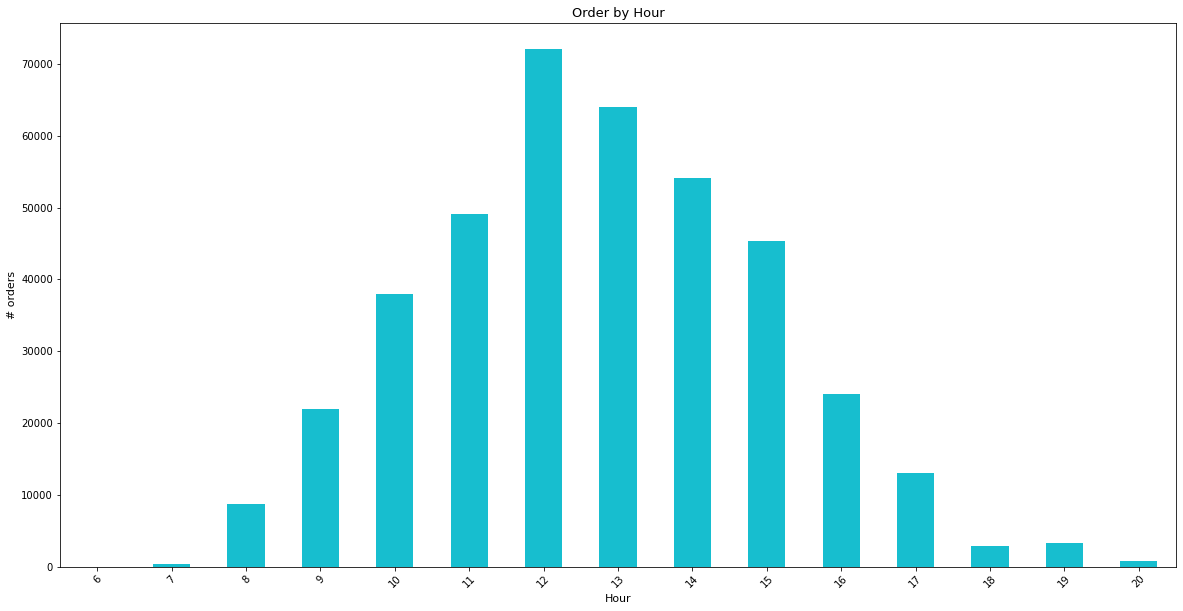

In [6]:
plot_bar(order_by_hour, 'Hour', '# orders', 'Order by Hour')

In [7]:
# 특정 날짜를 입력하면 시간과 분을 리턴하는 함수
def half_an_hour(date):
    minute = ':00'
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)
    if date.hour < 10:
        hour = '0' + hour
    
    return hour + minute

In [9]:
order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half

06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

In [11]:
order_by_hour_half / order_by_hour_half.sum()

06:00    0.000003
07:30    0.000953
08:00    0.007904
08:30    0.013936
09:00    0.023534
09:30    0.031617
10:00    0.042600
10:30    0.052897
11:00    0.047564
11:30    0.075798
12:00    0.093429
12:30    0.087691
13:00    0.078241
13:30    0.082675
14:00    0.067753
14:30    0.068261
15:00    0.060890
15:30    0.053136
16:00    0.035980
16:30    0.024562
17:00    0.022341
17:30    0.010511
18:00    0.004310
18:30    0.003049
19:00    0.003855
19:30    0.004491
20:00    0.002016
Name: CustomerID, dtype: float64

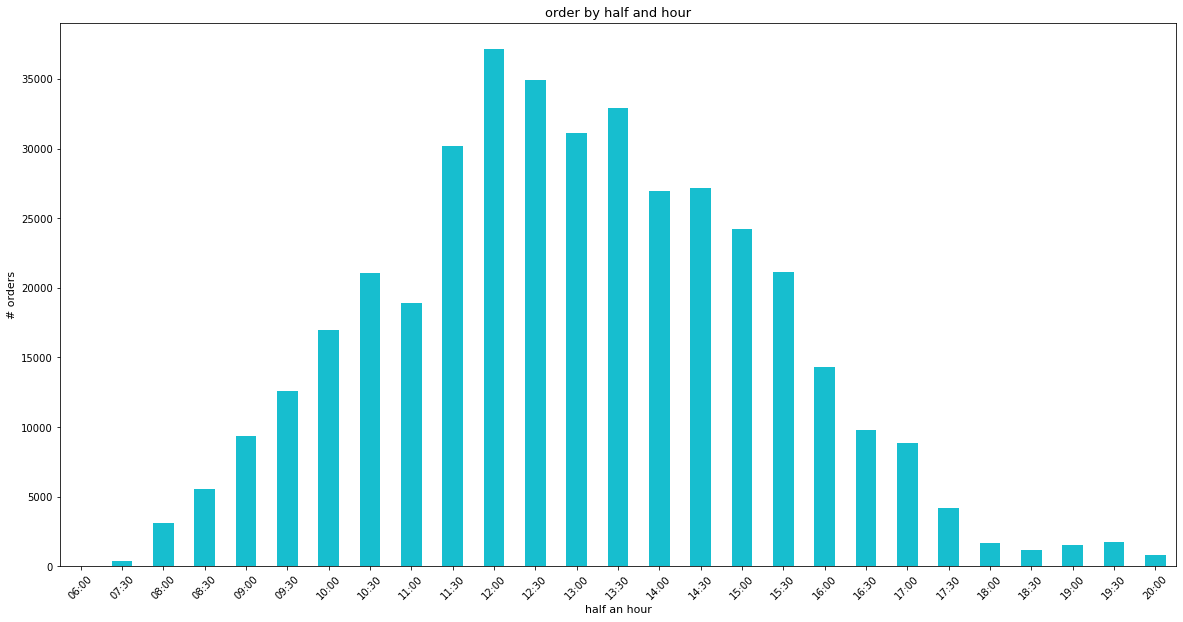

In [12]:
plot_bar(order_by_hour_half, 'half an hour', '# orders', 'order by half and hour')